In [14]:
from qiskit import * 
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
%matplotlib inline

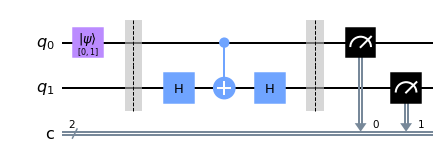

In [122]:
circuit = qiskit.QuantumCircuit(2,2)

circuit.initialize([0,1], 0)

circuit.barrier()
circuit.h(1)
circuit.cx(0,1)
circuit.h(1)
circuit.barrier()

circuit.measure([0,1],[0,1])

circuit.draw(output="mpl")

In [123]:
# simulators
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

In [124]:
sim_state_vector = qiskit.execute(circuit, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(circuit, backend=qasm_sim, shots=1024).result().get_counts()

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


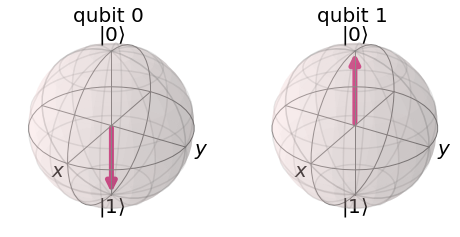

In [125]:
plot_bloch_multivector(sim_state_vector)

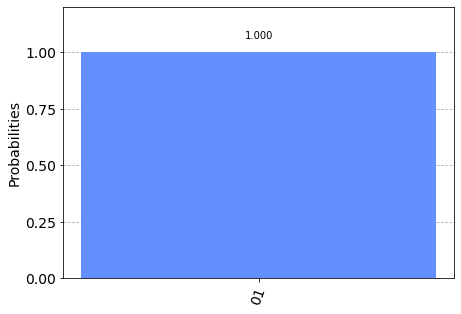

In [198]:
result = execute(circuit, backend=qasm_sim).result()

counts_sim = result.get_counts()

plot_histogram(counts_sim)

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


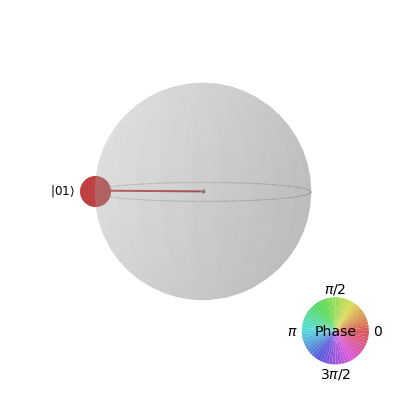

In [129]:
plot_state_qsphere(sim_state_vector)

In [128]:
circuit.qasm(formatted=True, filename="controlled_z.qasm")

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
initialize(0,1) q[0];
barrier q[0],q[1];
h q[1];
cx q[0],q[1];
h q[1];
barrier q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



In [193]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_gate_map, plot_error_map, plot_circuit_layout
from qiskit.tools.monitor import job_monitor

In [232]:
if not IBMQ.active_account():
    IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [233]:
print(provider)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>


In [234]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits > 1 and b.status().operational and not b.configuration().simulator))

In [239]:
backend = least_busy(provider.backends(filters=lambda b: b.status().operational and not b.configuration().simulator))

In [249]:
backend = least_busy(provider.backends(filters=lambda b: not b.configuration().simulator))

In [251]:
backend

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

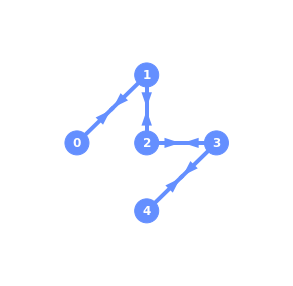

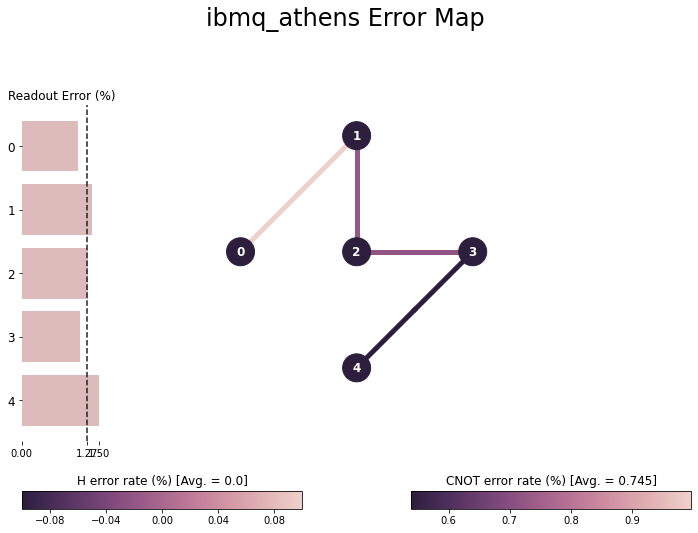

In [299]:
display(plot_gate_map(backend, plot_directed=True))
display(plot_error_map(backend))

In [276]:
all_backends_available = provider.backends(filters=lambda b: b.configuration().n_qubits > 1 and b.status().operational and not b.configuration().simulator)

In [281]:
for backend in all_backends_available[0:3]:
    
    job = execute(circuit, backend, shots=1000)
    
    print("Backend: " + backend.name() + " - Job ID: " + job.job_id())
    
    job_monitor(job)
    
    print("\n")
    
    result = job.result()
    counts[backend.name()] = result.get_counts(circuit)

Backend: ibmqx2 - Job ID: 60bd2a7c61f15fc4f4ba0cbe
Job Status: job has successfully run


Backend: ibmq_16_melbourne - Job ID: 60bd2a8b3d55c56e42c70f9a
Job Status: job has successfully run


Backend: ibmq_athens - Job ID: 60bd2b041c8d4f089d1ff16d
Job Status: job has successfully run




In [282]:
counts["qasm_simulator"] = counts_sim


Raw results: {'ibmq_belem': {'00': 54, '01': 933, '10': 2, '11': 11}, 'simulator': {'01': 1024}, 'ibmqx2': {'00': 108, '01': 860, '10': 10, '11': 22}, 'ibmq_16_melbourne': {'00': 65, '01': 816, '10': 11, '11': 108}, 'ibmq_athens': {'00': 26, '01': 962, '11': 12}, 'qasm_simulator': {'01': 1024}}


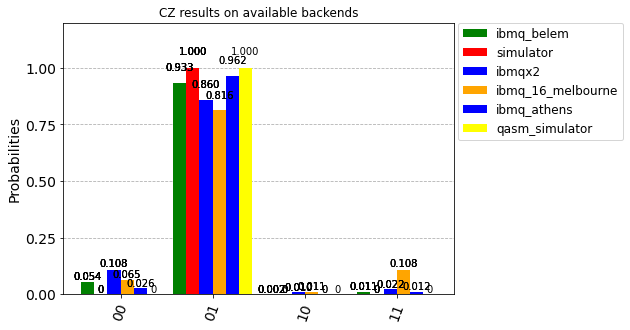

In [284]:
print("\nRaw results:", counts)

colors = ['green', 'red', 'blue', 'orange', 'blue', 'yellow']

display(plot_histogram(list(counts.values()), 
                       title = "CZ results on available backends", 
                       legend=list(counts), 
                       color = colors[0:len(colors)], bar_labels=True))

In [262]:
provider.backends(filters=lambda b: not b.configuration().simulator)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [322]:
import qiskit.quantum_info as qi

matrix_density = qi.DensityMatrix(sim_state_vector)
matrix_density.draw('latex', prefix='\\ Matrix\ Density = ')

<IPython.core.display.Latex object>

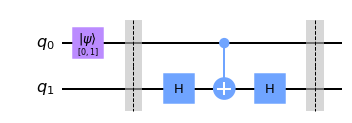

In [293]:
circuit = qiskit.QuantumCircuit(2)

circuit.initialize([0,1], 0)

circuit.barrier()
circuit.h(1)
circuit.cx(0,1)
circuit.h(1)
circuit.barrier()

circuit.draw('mpl')


Backend: ibmqx2 / Num. qubits: 5


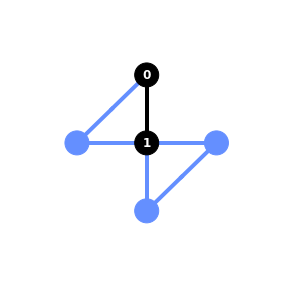


Backend: ibmq_16_melbourne / Num. qubits: 15


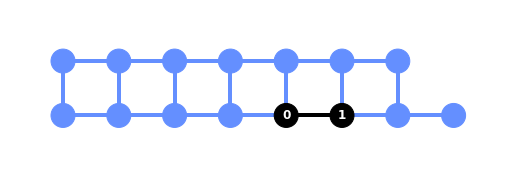


Backend: ibmq_athens / Num. qubits: 5


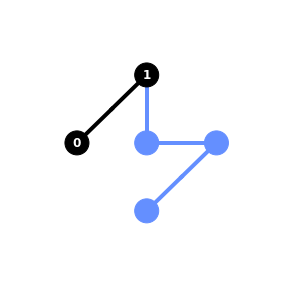


Backend: ibmq_santiago / Num. qubits: 5


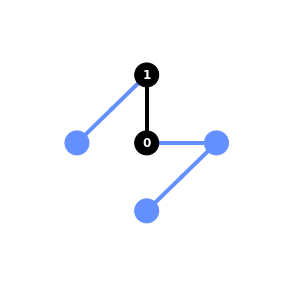


Backend: ibmq_lima / Num. qubits: 5


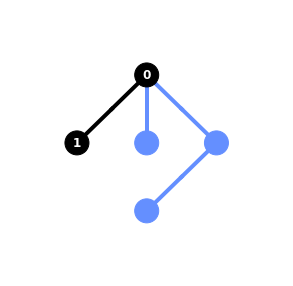


Backend: ibmq_belem / Num. qubits: 5


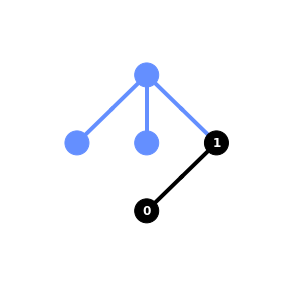


Backend: ibmq_quito / Num. qubits: 5


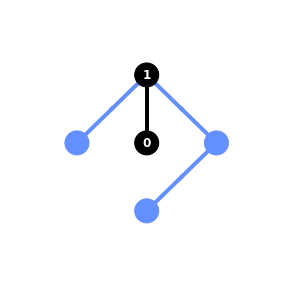


Backend: ibmq_manila / Num. qubits: 5


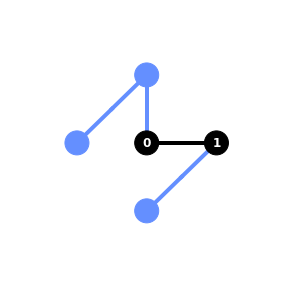

In [321]:
for i in range(len(all_backends_available)):

    curent_backend = all_backends_available[i]
    transpiled_circuit = transpile(circuit, backend=curent_backend, optimization_level=3)
    
    print("\nBackend: " + curent_backend.name() + " / Num. qubits: " + str(curent_backend.configuration().n_qubits))
    display(plot_circuit_layout(transpiled_circuit, curent_backend))

In [295]:
usim = Aer.get_backend('unitary_simulator')

transpiled = transpile(circuit, backend=usim)
transpiled.draw('mpl')

qobj = assemble(transpiled)

unitary = usim.run(qobj).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit operation = }\n")

<IPython.core.display.Latex object>